<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.5/Sentiment_Analysis_(LSTM%2CGRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis

- IMDB dataset으로 리뷰 감성 분류
- one-hot encoding 사용
- LSTM과 GRU 모델 비교

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers.embeddings import Embedding


[1] Data

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)
print (x_train.shape, x_test.shape)

print(x_train[0])
# 리뷰의 형태가 여러 개의 정수로 이루어져 있음(텍스트가 아닌 숫자로 데이터가 이루어져있음)

# 문자로 확인
word_to_index = imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items():
  index_to_word[value+3] = key
  # 0, 1, 2, 3은 특별 token(0: padding, 1: 문장 시작, 2: 미확인)으로 3을 더해서 배열에 저장

for index, token in enumerate(("<pad>", "<sos>", "<unknown>")):
  index_to_word[index] = token

print(''.join([index_to_word[index] for index in x_train[0]]))

print(y_train[:20])
# 1 : 긍정, 0 : 부정

17473536/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1654784/1641221 [==============================] - 0s 0us/step
<sos>

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 1234)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12250,)
(5250,)
(12250,)
(5250,)


In [8]:
# x_train, x_test의 리뷰 길이가 너무 길기 때문에 리뷰 하나 당 길이를 맞춰줌
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=50)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=50)

print(x_train[0])

[ 94   2   2   5   2   8   2 139 141  17 372   2   2   6   2  19   4   2
   2  68   2   2   2 389 302  10  10   2   2  59   2   8   2   2  41 336
   2   8   2 409  17  18  14  22  12  80   2  91  13 104]


[2] Model

In [18]:
model = keras.Sequential()

model.add(Embedding(input_dim = 12250, output_dim = 32, input_length = 50))
# input_dim = x_train의 단어 수, input_length = maxlen = 50
#model.add(keras.layers.LSTM(units = 100))
model.add(keras.layers.GRU(128))
model.add(keras.layers.Dense(units = 1 , activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 64)
loss, acc = model.evaluate(x_test, y_test)
print('loss : ', round(loss,3))
print('accuracy : ', round(acc,3))

Epoch 1/30
192/192 [==============================] - 20s 96ms/step - loss: 0.6246 - accuracy: 0.6300
Epoch 2/30
192/192 [==============================] - 18s 95ms/step - loss: 0.5044 - accuracy: 0.7517
Epoch 3/30
192/192 [==============================] - 15s 77ms/step - loss: 0.4864 - accuracy: 0.7602
Epoch 4/30
192/192 [==============================] - 15s 77ms/step - loss: 0.4696 - accuracy: 0.7752
Epoch 5/30
192/192 [==============================] - 15s 78ms/step - loss: 0.4590 - accuracy: 0.7788
Epoch 6/30
192/192 [==============================] - 15s 78ms/step - loss: 0.4446 - accuracy: 0.7853
Epoch 7/30
192/192 [==============================] - 15s 78ms/step - loss: 0.4339 - accuracy: 0.7936
Epoch 8/30
192/192 [==============================] - 15s 80ms/step - loss: 0.4273 - accuracy: 0.7982
Epoch 9/30
192/192 [==============================] - 15s 79ms/step - loss: 0.4162 - accuracy: 0.8057
Epoch 10/30
192/192 [==============================] - 15s 80ms/step - loss: 0.411

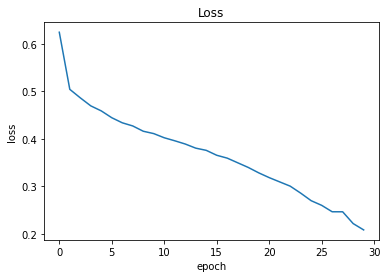

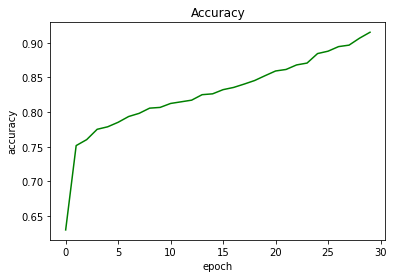

In [24]:
# 그래프로 loss와 accuracy 나타내기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.show()
plt.plot(history.history['accuracy'],'g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()